In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [29]:
class System:
    
    Eta      = 0.5
    v0       = 1.0
    Edge     = 10   # size of box
    InRadius = 0.5    # interaction radius
    dt       = 0.02  # time step
    Steps    = 5000  # number of time steps
    N        = 500  # number of particles
    
    def __init__(self, div_ratio=0):
        self.div_ratio = int(div_ratio * System.N)
        print("Ratio: ", self.div_ratio)
        
    def populate(self):
        
        # Generate Positions
        self.x = np.random.rand(System.N, 1)*System.Edge
        self.y = np.random.rand(System.N, 1)*System.Edge
        
        # Generate Particle Velocities
        self.theta = 2 * np.pi * np.random.rand(System.N, 1) # Random Angles
        self.vx = System.v0 * np.cos(self.theta)
        self.vy = System.v0 * np.sin(self.theta)
        
         # Plotting Vector Field with QUIVER
        plt.quiver(self.x, self.y, np.cos(self.theta), np.sin(self.theta), np.arange(System.N), cmap='magma')
        plt.title('Initialized Field')
    
        # Show plot with grid
        plt.grid()
        plt.show()
        
    def step(self, divergence=False):    
        # move
        self.x += self.vx*System.dt
        self.y += self.vy*System.dt
            
        # apply periodic BCs
        self.x = self.x % System.Edge
        self.y = self.y % System.Edge
            
        
        # find mean angle of neighbors within R
        mean_theta = self.theta
             
        for b in range(System.N):
                
            # Determine neighbours for each
            neighbors = (self.x - self.x[b])**2 + (self.y - self.y[b])**2 < System.InRadius**2
            #Inverted operation to prevent a brodcasting issue.
                
            self.sx = np.sum(np.cos(self.theta[neighbors]))
            self.sy = np.sum(np.sin(self.theta[neighbors]))
            
            mean_theta[b] = np.arctan2(self.sy, self.sx)
            
            # add random perturbations
            self.theta = mean_theta + System.Eta*(np.random.rand(System.N, 1) - 0.5)
            # update velocities
            if divergence:
                self.theta[:self.div_ratio] = np.negative(self.theta[:self.div_ratio])

            
            self.vx = System.v0 * np.cos(self.theta)
            self.vy = System.v0 * np.sin(self.theta)
   
    def evolve(self, live=False, flow=False, divergence=False, track=True):
        track_ = [], [],  [], []
        if not live:
            for i in range(System.Steps):
                self.step(divergence=divergence)
            
        else:
            # Create Graph Resource
            fig, ax = plt.subplots()
            self.Quiver = ax.quiver(self.x, self.y, np.cos(self.theta), np.sin(self.theta), np.arange(System.N), cmap='magma')
            plt.xlim([0, System.Edge])
            plt.ylim([0, System.Edge])
            
            plt.grid()
            colors = np.arange(System.N)
            
            def animate(i):
                self.step(divergence=divergence)
                
                if not flow:
                    plt.cla()
                
                if track:
                    track_[0].append(self.x[0])
                    track_[1].append(self.y[0])
                    track_[2].append(self.x[-1])
                    track_[3].append(self.y[-1])
                    ax.scatter(track_[0], track_[1], c='b', marker='o', alpha=0.5, s=0.4)
                    ax.scatter(track_[2], track_[3], c='r', marker='o', alpha=0.5, s=0.4)
                    
                #newax2 = fig.add_axes(ax.get_position(), frameon=False)     
                ax.quiver(self.x, self.y, np.cos(self.theta), np.sin(self.theta), np.arange(System.N), cmap='magma')
            
                plt.title(f'Active Field - {i}')
                plt.xlim([0, System.Edge])
                plt.ylim([0, System.Edge])
                #return ax
            
            # calling the animation function     
            anim = FuncAnimation(fig, animate,
                                frames = System.Steps, interval = 20, blit = False)
            
            name = f'{str(time.time_ns())[:-6]}_active_field_{System.Steps}_steps_{self.div_ratio}_ratio_{System.N}.mp4'
            print(f"Writing animation to: {name}")
            anim.save(name, writer = 'ffmpeg', fps = 10) 

            plt.show()
            return name
                
        

Ratio:  100


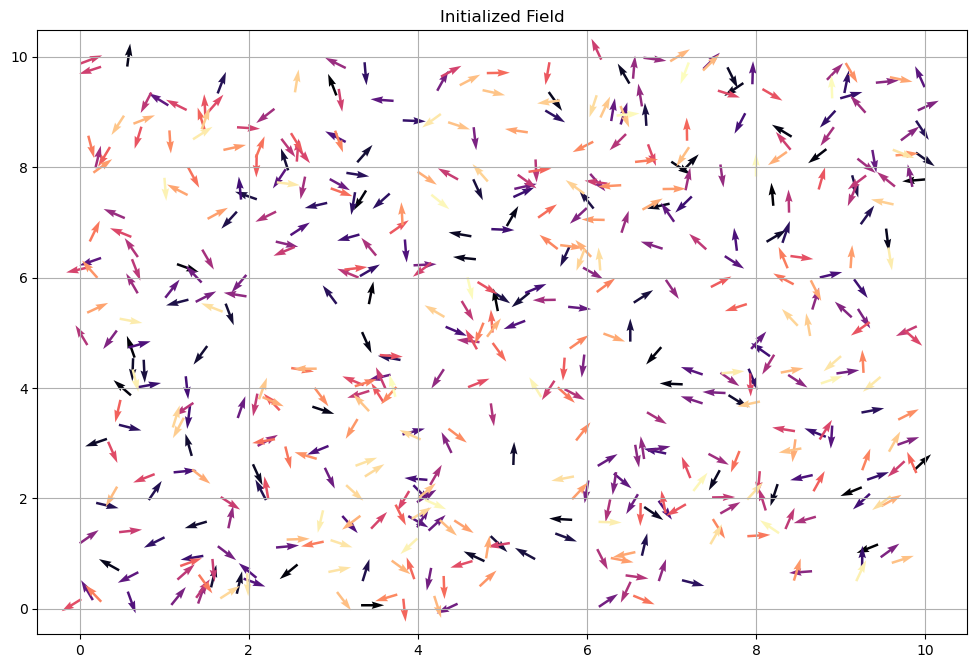

In [30]:
sys = System(div_ratio=0.2)
sys.populate()

Writing animation to: 1657048568988_active_field_5000_steps_100_ratio_500.mp4


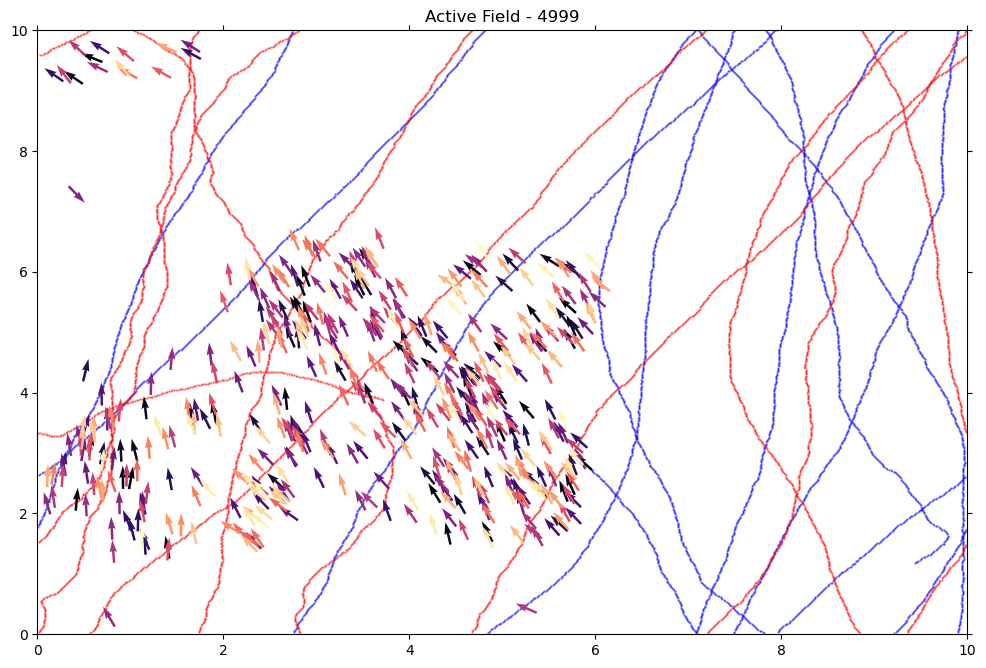

Duration:  1013.104 s


In [31]:
start = time.perf_counter()
name = sys.evolve(live=True, flow=False, divergence=False, track=True)
end = time.perf_counter()
print("Duration: ", f"{end-start:.3f}", "s")

In [28]:
! vlc {name}

[015c89e0] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
[04fd6050] avcodec decoder: Using D3D11VA (Intel(R) UHD Graphics 630, vendor 8086(Intel), device 3e9b, revision 0) for hardware decoding
[059fbd08] avcodec decoder: Using D3D11VA (Intel(R) UHD Graphics 630, vendor 8086(Intel), device 3e9b, revision 0) for hardware decoding
[052a3d08] avcodec decoder: Using D3D11VA (Intel(R) UHD Graphics 630, vendor 8086(Intel), device 3e9b, revision 0) for hardware decoding
[04fd7d10] direct3d11 vout display error: SetThumbNailClip failed: 0x800706f4


In [ ]:
class ViscekActiveEntity:
    def __init__(speed=1.0, theta=0, pos=0):
        
        self.pos = pos
        self.speed = speed
        self.theta = theta # Direction of entity
        
    def update_step(self, avg_theta, time_step=1):
        perturbation = np.random.uniform(-System.Eta/2, System.Eta/2)
        theta_nxt = avg_theta + perturbation
        speed_now = v0 * [math.cos(theta_nxt) + math.sin(theta_nxt)]
        self.pos = self.pos + self.speed * time_step
        

In [159]:
from matplotlib.quiver import Quiver
print(Quiver.__doc__)


    Specialized PolyCollection for arrows.

    The only API method is set_UVC(), which can be used
    to change the size, orientation, and color of the
    arrows; their locations are fixed when the class is
    instantiated.  Possibly this method will be useful
    in animations.

    Much of the work in this class is done in the draw()
    method so that as much information as possible is available
    about the plot.  In subsequent draw() calls, recalculation
    is limited to things that might have changed, so there
    should be no performance penalty from putting the calculations
    in the draw() method.
    
